In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")



---


#Introduction

The purpose of this project is to analyze the impact of the Covid-19 pandemic on voter registration in the United States during the presidential elections of 2016 and 2020. Examining the data on a national and state-level can help us understand how external factors influence voter engagement and registration patterns. The goal is to identify the trend in voter registration numbers, determine the causes for these changes, and explore their implications for future elections. This is important as it allows government organizations to understand limitations in voter registration as well as how to change their methods to promote voter participation. Overall, the analysis of the data is crucial to help government officials address challenges in the voter registration process and ensure fair and accessible elections for the future.

Question 1 (National Trend): How did COVID-19 impact voter registration trends across the 12 states when comparing voter registration from 2020 to 2016?

Question 2 (State Trend): Which state saw the greatest change in voter registration due to COVID-19?





---

#Data Processing


In [4]:
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Jurisdiction - A list of 11 states and Washington, DC

Year - Contains only two values (2016 and 2020), which represent the US Presidential Election years

Month - Months when data was recorded (January to April, with some data for 4 states and Washington, DC extending to May)

New registered voters - Number of first-time voters

In [6]:
voters.isnull().values.any()

False

In [7]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


In [25]:
voters = voters.rename(columns={"Jurisdiction" : "NAME", "New registered voters":"registered_voters"})
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


Some potential limitations in the data set include limited locations and a short time frame. The data only contains 11 states and Washington, DC, which is not a great representation of the US as a whole and therefore, may not provide completely accurate information. It also only provides data from Janurary to April/May and neglects the rest of the months leading up to the election, failing to show the long-term trends in registered voters.


---

#Exploratory Data Analysis

In [9]:
voters.loc[voters.registered_voters==voters.registered_voters.max()]

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


The highest amount of new voter registration was in February 2020 in the state of California, with a total of 238281 registered voters.

In [12]:
avg_voter_registration = voters.registered_voters.mean()
avg_voter_registration

48223.46226415094

The average voter registration is 48223.46 per month.

In [13]:
high_voters = voters.loc[voters.registered_voters>avg_voter_registration]
high_voters["registered_voters"].count()

36

There are 36 times where the voter registration was higher than the average voter registration.

In [14]:
high_voters.value_counts("NAME")

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


* Texas went above the national average for new voter registration 8 times
* California went above the national average for new voter registration 7 times
* Florida went above the national average for new voter registration 7 times
* North Carolina went above the national average for new voter registration 6 times
* Illinois went above the national average for new voter registration 4 times
* Arizona went above the national average for new voter registration 3 times
* Georgia went above the national average for new voter registration 1 time

In [15]:
avg_voters = voters.groupby("NAME")["registered_voters"].mean()
avg_voters.sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


California, Texas, and Florida had the highest average voter registration overall.


---

#Data Visualization

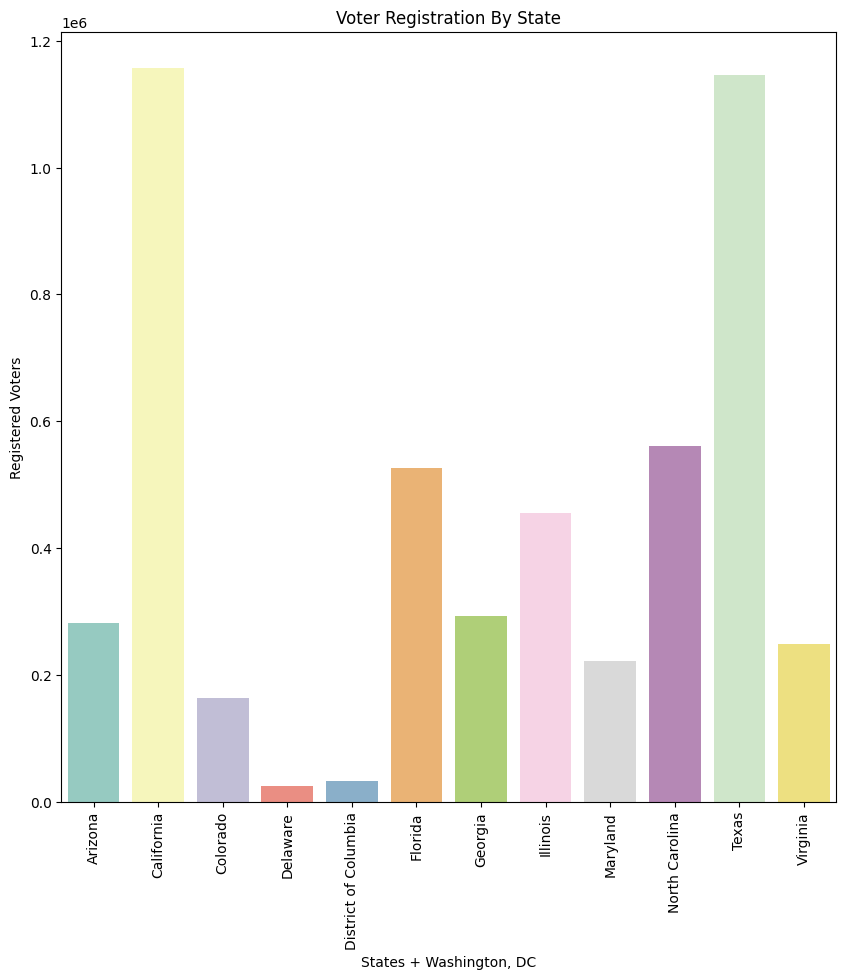

In [16]:
total_voters = voters.groupby("NAME")["registered_voters"].sum().reset_index()
plt.figure(figsize = (10,10))
sns.barplot(total_voters, x="NAME", y="registered_voters", palette='Set3', hue = "NAME")
plt.ylabel("Registered Voters")
plt.xlabel("States + Washington, DC")
plt.title("Voter Registration By State")
plt.xticks(rotation = 90)
plt.show()

California and Texas have a significantly higher number of voter registrations than others.

Smaller locations such as Delaware and Washington, DC have significantly less voter registrations.

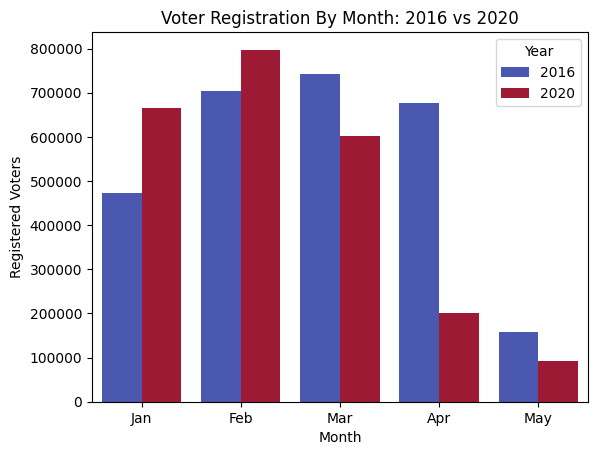

In [17]:
month_voters = voters.groupby(["Month", "Year"])["registered_voters"].sum().reset_index()
sns.barplot(month_voters, x="Month", y="registered_voters", order=["Jan", "Feb", "Mar", "Apr", "May"], hue="Year", palette="coolwarm")
plt.ylabel("Registered Voters")
plt.xlabel("Month")
plt.title("Voter Registration By Month: 2016 vs 2020")
plt.show()

From January to February, voter registration in 2020 had a significantly higher number than in 2016, indicating more awareness and excitement towards the upcoming election. However, due to the rise of Covid-19, voters decreased by nearly 200,000 in March. In April, where 2016 only had a slight decrease in voters, 2020 suffered a massive drop, falling to a total of 200,000 voters registered in April. Voter registration in May 2020 decreased to the lowest its ever been, garnering 100,000 voterss total. The closing of government offices and public spaces where Americans can vote could be a contribution to this factor.

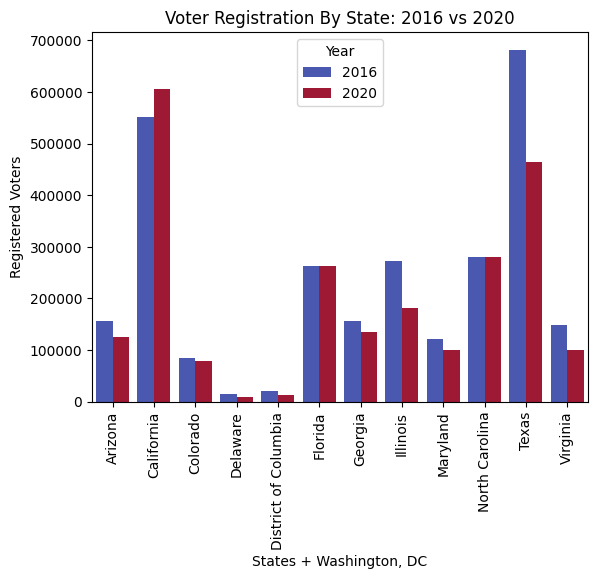

In [18]:
state_voters = voters.groupby(["NAME", "Year"])["registered_voters"].sum().reset_index()
sns.barplot(state_voters, x="NAME", y="registered_voters", hue="Year", palette="coolwarm")
plt.ylabel("Registered Voters")
plt.xlabel("States + Washington, DC")
plt.title("Voter Registration By State: 2016 vs 2020")
plt.xticks(rotation = 90)
plt.show()

Texas and California saw the greatest change from 2016 to 2020. Texas faced a massive decrease in voter registration, from nearly 700,000 in 2016 to barely 500,000 total voters in 2020. While every other state faced a slight decrease in voter registration, California is the only one within the data to have an increase in their total voter registration in 2020 despite the Covid-19 pandemic.



---


#Mapping

In [20]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.26 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [27]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
us = states.cx[minx:maxx, miny:maxy]

In [22]:
avg_voter_reg_bystate = voters.groupby("NAME")["registered_voters"].mean().reset_index()
avg_voter_reg_bystate

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


In [23]:
state_avg_voter_reg = states.merge(avg_voter_reg_bystate, on="NAME", how="inner")
state_avg_voter_reg

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


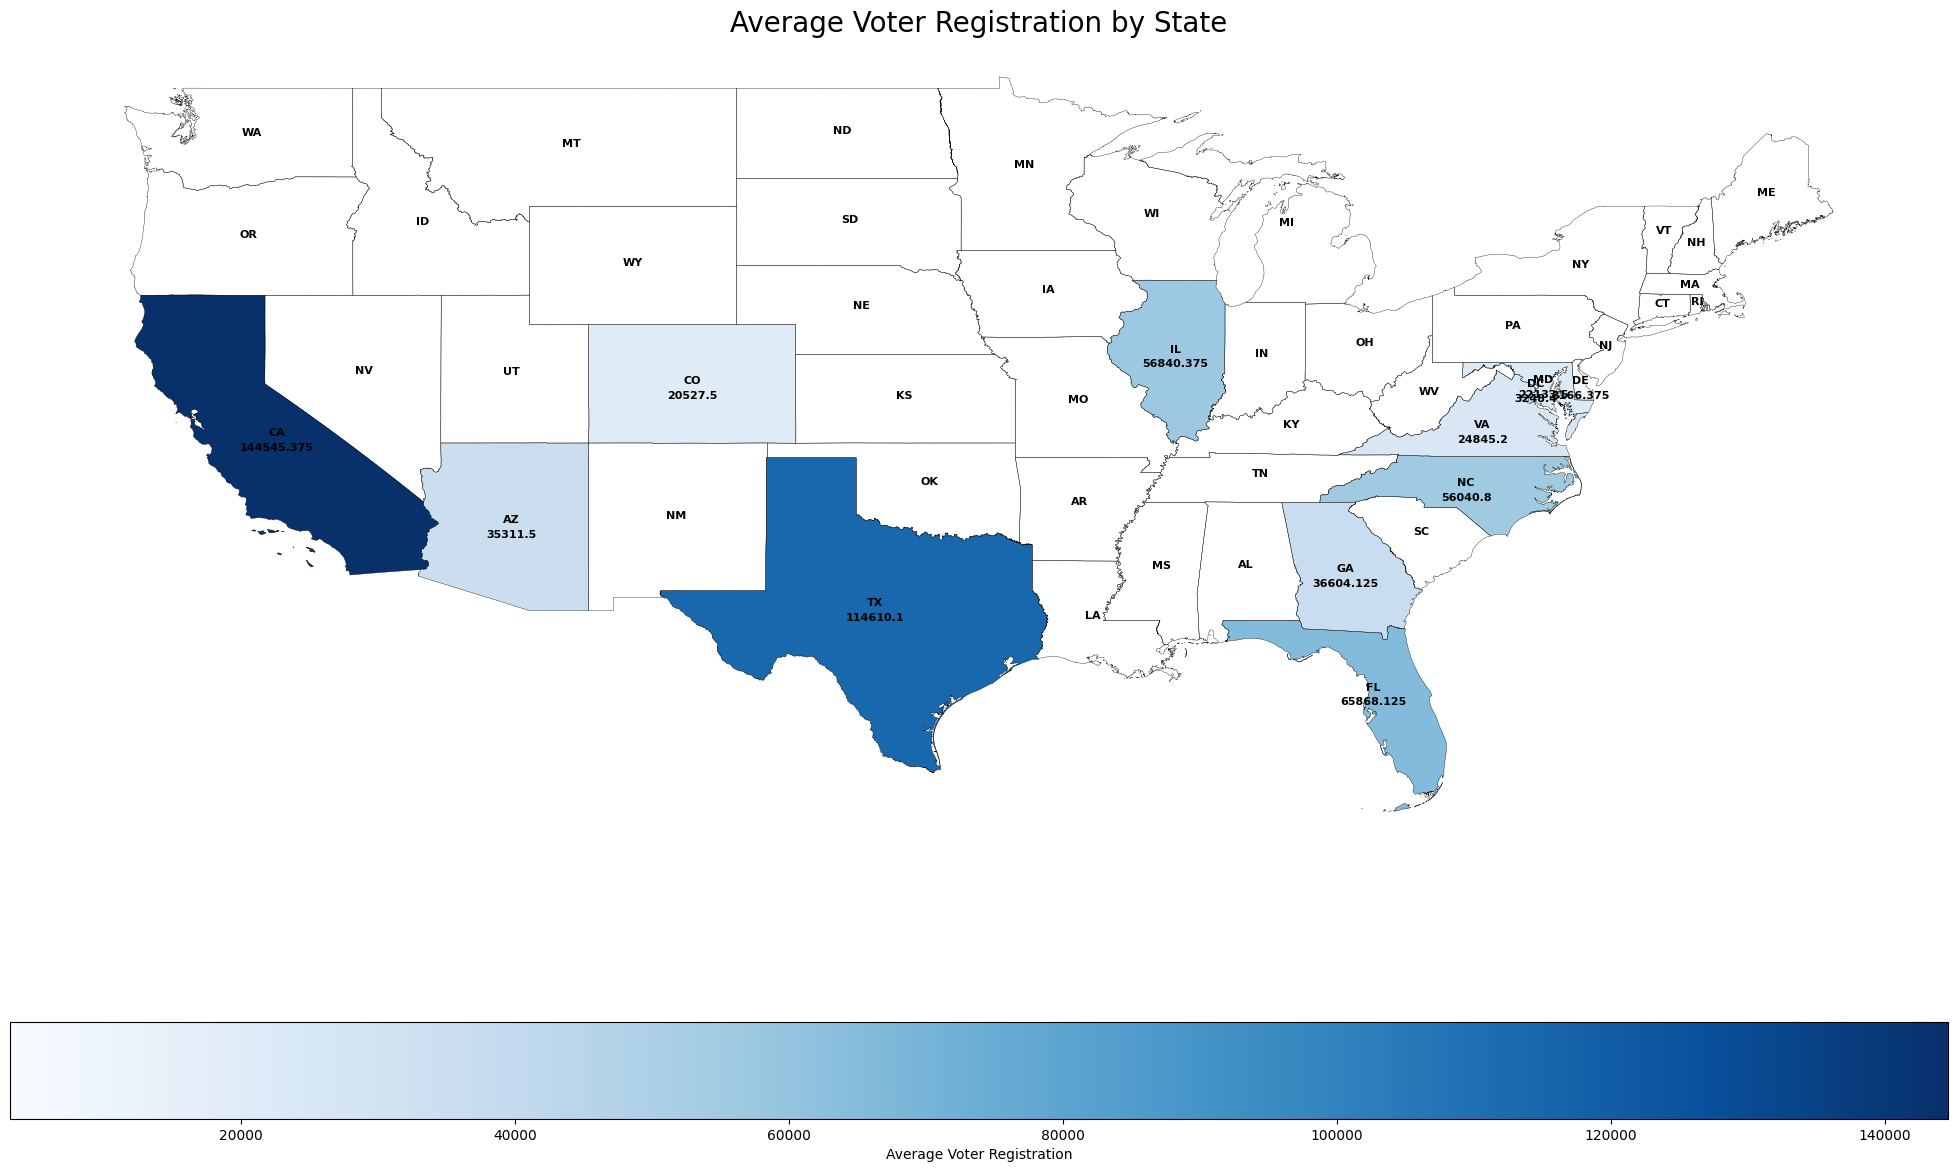

In [24]:
fig, ax = plt.subplots(figsize=(25, 15))

us.boundary.plot(ax=ax, color="black", linewidth=0.25)

state_avg_voter_reg.plot(ax=ax, column="registered_voters", cmap="Blues", linewidth=0.25,
                         legend=True, legend_kwds={"label": "Average Voter Registration", "orientation": "horizontal"})

states.apply(lambda x: ax.annotate(
    text=x.STUSPS,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y),
    ha="center", fontsize=8, color="black", fontweight="bold"), axis=1)

state_avg_voter_reg.apply(lambda x: ax.annotate(
    text=x.registered_voters,
    xy=(x.geometry.centroid.x, x.geometry.centroid.y - 0.5),
    ha="center", fontsize=8, color="black", fontweight="bold"), axis=1)

ax.axis("off")
plt.title("Average Voter Registration by State", fontsize=20)
plt.show()



---


#Conclusion

###Insights

An analysis of the voter registration data revealed that there were significant changes due to the impact of the Covid-19 pandemic. In early 2020, there were higher numbers of new voter registrations compared to 2016, which suggests an increased awareness or enthusiasm for the election. However, as Covid-19 began to spread rapidly, the voter registrations also dropped significantly in the later months. This could be due to the closure of government facilities and in-person registration locations. Other insights reveal that Texas experienced the largest decrease in voter registrations from 2016 to 2020, whereas California was the only state in the dataset to show an increase in the total number of voter registration.

###Suggestions

To address the challenges posed by Covid-19, government officials should consider permitting online voter registration options to ensure a more fair and accessible election. Especially in states that are more highly densed such as Texas and Florida, it could be incredibly beneficial to combat the closure of voting facilities by offering alternative voting methods. It is also just as important to work on public awareness campaigns to keep Americans informed and engaged with the current status of the election. Having data for the later months that lead up to the election would provide a more accurate view of the voter registration trends and give us a better understanding of what to do during times of crisis.

###Possible Next Steps

If I were to continue this project, I would expand the dataset by including all 50 states as well as the data for all the months that lead up to the election. This would help identify long-term trends in voter registration and a more accurate view of the United States as a whole. Another possible step is to collect data of voters' age and race to identify which demographic was most impacted by the pandemic. This would allow us to address the concerns and determine methods that best accommodate all voters.

---


#Github

https://github.com/trinityj14/325-Midterm.git

---


#Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Trinity Jin